## Imports

In [ ]:

########################### (https://github.com/curiousily/TensorFlow-on-Android-for-Human-Activity-Recognition-with-LSTMs/blob/master/human_activity_recognition.ipynb) imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

#!pip install imbalanced-learn

#from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.utils import shuffle

from matplotlib.pyplot import figure

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier



# Upload Data 

---------------------------------



Train

In [ ]:
from google.colab import files
uploaded_signal_train = files.upload()

Saving 28_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 29_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_3_Participant_SlideSize_10_Handcrafted_Feat

Test

In [ ]:
from google.colab import files
uploaded_signal_test = files.upload()

Saving 28_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 32_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 32_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 32_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 32_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 33_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_LJP to 33_7_Participant_SlideSize_10_Handcrafted_Feat

### Reading in segments & labels

Train

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_train = [key for key in uploaded_signal_train.keys()]


# set up list to hold all loaded npy 
all_dataframe_train = [] 


for i in range(len(list_of_dataframes_train)):

    # load in the data 
    dataframe_train = pd.read_csv(list_of_dataframes_train[i])


    # append the data to 'all' list
    all_dataframe_train.append(dataframe_train) 


all_df_train = pd.concat(all_dataframe_train)

Test

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_test = [key for key in uploaded_signal_test.keys()]


# set up list to hold all loaded npy 
all_dataframe_test = [] 


for i in range(len(list_of_dataframes_test)):

    # load in the data 
    dataframe_test = pd.read_csv(list_of_dataframes_test[i])


    # append the data to 'all' list
    all_dataframe_test.append(dataframe_test) 


all_df_test = pd.concat(all_dataframe_test)


# Quick Look 

In [ ]:
all_df_train.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.345651,0.243621,-0.378761,-7.702587,-36.274094,6.544647,-0.001866,-0.004209,0.010049,[ 4.44089210e-16+0.j -1.36743098e-01-0...,[ 5.55111512e-16+0.j 6.02078568e-02-0...,[ 5.55111512e-16+0.j 6.02078568e-02-0...,10.0,10.0,10.0,0.226947,0.270919,0.270919,1.014269,1.463456,1.463456,1.014269,1.463456,1.463456,1.085933,0.136027,0.136027,0,0,0,0.032882,0.042589,0.044694,0.221493,0.374326,0.246606,0.001253,0.000584,0.000988,...,6.783730,-0.000156,-0.003209,0.011021,-0.393286,0.181635,-0.442786,-8.061852,-36.759109,6.201022,-0.003715,-0.005141,0.007720,0.968032,50.521328,0.016125,0.327178,1418.222109,0.000125,0.062303,0.065942,0.081665,0.338572,0.585278,0.494285,0.001920,0.000705,0.001263,0.493614,-0.501615,0.316065,-0.743477,-0.409541,0.266258,0.241051,0.162547,0.253310,Go,28,2
1,1,-0.319342,0.162098,-0.342011,-7.738424,-36.147514,6.689313,-0.001100,-0.004092,0.008219,[-2.22044605e-16+0.j 8.10724443e-02+0...,[-1.11022302e-16+0.j 1.73273293e-01-0...,[-1.11022302e-16+0.j 1.73273293e-01-0...,10.0,10.0,10.0,0.349178,0.331988,0.331988,1.409548,1.535443,1.535443,1.409548,1.535443,1.535443,1.111614,1.028266,1.028266,0,0,0,0.050333,0.048506,0.066542,0.257834,0.426416,0.117972,0.000964,0.000973,0.002203,...,6.783730,-0.000156,-0.002876,0.011021,-0.393286,0.091814,-0.442786,-8.061852,-36.771113,6.386037,-0.003107,-0.006575,0.004726,0.823451,50.575251,0.013411,0.254541,1411.535084,0.000092,0.090104,0.085942,0.099641,0.480858,0.823928,0.138442,0.000823,0.000870,0.003775,-0.686037,0.400664,-0.931307,-0.672780,0.220964,-0.295968,0.735916,0.368056,0.203087,Go,28,2
2,2,-0.271131,0.152904,-0.319191,-7.378853,-36.185124,6.572727,-0.000447,-0.003125,0.005925,[ 2.77555756e-17+0.j -1.63596684e-01-0...,[-2.77555756e-17+0.j -1.22561277e-01+0...,[-2.77555756e-17+0.j -1.22561277e-01+0...,10.0,10.0,10.0,0.166835,0.279101,0.279101,1.472690,0.708644,0.708644,1.472690,0.708644,0.708644,0.071999,1.012308,1.012308,0,0,0,0.027377,0.040053,0.049630,0.591822,0.368272,0.125559,0.001518,0.001659,0.000804,...,6.757243,0.001655,-0.000278,0.007255,-0.328298,0.091814,-0.400806,-7.994001,-36.771113,6.386037,-0.003107,-0.006575,0.004726,0.743226,50.136704,0.010305,0.203591,1407.513063,0.000051,0.038717,0.067301,0.069507,1.036439,0.670277,0.184128,0.001735,0.001489,0.001226,0.226927,-0.656599,-0.653995,-0.625427,0.540082,-0.179181,0.780441,-0.404743,-0.199011,Go,28,2
3,3,-0.249181,0.161472,-0.330511,-6.654501,-36.508391,6.678391,0.000861,-0.001989,0.005660,[-2.22044605e-16+0.j 6.36372285e-02+0...,[-9.71445147e-17

In [ ]:
all_df_test.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.682452,-1.537566,1.163282,-31.175807,15.108035,6.015167,0.937977,-0.072320,-0.046816,[-2.22044605e-16+0.j 1.53001337e-01+0...,[ 1.22124533e-15+0.j 1.22016169e+00+2...,[ 1.22124533e-15+0.j 1.22016169e+00+2...,20.0,10.0,10.0,0.643152,2.448863,2.448863,4.655601,14.411731,14.411731,4.655601,14.411731,14.411731,-0.661059,0.386908,0.386908,0,0,0,0.109038,0.380652,0.214096,0.662956,1.406793,0.416355,0.222151,0.088708,0.011931,...,6.772522,1.446242,-0.019637,-0.021178,-0.830064,-1.931298,0.771279,-32.231030,12.583961,5.367462,0.653755,-0.305338,-0.062037,3.383299,52.299009,1.057113,4.385696,1238.957808,0.944586,0.140295,0.525360,0.224491,0.294349,0.401318,0.453442,0.187720,0.022940,0.015471,0.666391,-0.695607,-0.953410,0.983856,0.946480,0.928574,-0.878817,0.824730,-0.600255,Go,28,7
1,1,-0.570402,-1.360722,1.709553,-32.287807,12.585200,5.150206,1.381306,-0.296202,-0.136848,[-7.21644966e-16+0.j 1.05372356e-01+0...,[ 2.77555756e-15+0.j -1.88132267e+00-1...,[ 2.77555756e-15+0.j -1.88132267e+00-1...,20.0,10.0,10.0,0.860700,2.244292,2.244292,9.321138,8.889377,8.889377,9.321138,8.889377,8.889377,-0.050429,0.711532,0.711532,0,0,0,0.151184,0.332196,0.796803,0.834394,2.198260,0.604916,0.315140,0.219459,0.140874,...,5.863824,1.718010,-0.023043,-0.021178,-0.829737,-1.874020,0.771279,-33.791976,7.878010,4.060401,0.901326,-0.633810,-0.448732,3.640678,50.023212,1.814355,5.867602,1233.308799,2.181790,0.219628,0.541532,1.328693,1.394364,3.066943,1.099722,0.590682,0.332308,0.122365,-0.061180,0.647081,-0.624960,0.984721,0.980586,0.951740,-0.906847,-0.608250,0.856768,Go,28,7
2,2,-0.432210,-1.553906,2.907824,-33.842049,8.614268,4.289888,1.360710,-0.788843,-0.515477,[ 8.60422844e-16+0.j -1.86008136e-01+0...,[0. +0.j 0.75013999-0.48745819j...,[0. +0.j 0.75013999-0.48745819j...,20.0,10.0,10.0,0.906017,0.894609,0.894609,9.525538,14.787252,14.787252,9.525538,14.787252,14.787252,0.162686,-0.369606,-0.369606,0,0,0,0.155728,0.212389,0.734981,1.065952,2.695428,0.457061,0.372331,0.351509,0.310274,...,5.337253,1.718010,-0.360445,-0.074735,-0.730284,-1.799700,1.278333,-35.322797,5.257983,3.845828,0.585038,-1.394647,-0.914100,4.893939,46.746205,2.665030,11.666423,1246.503540,3.097979,0.159782,0.112439,0.853469,1.991838,5.399224,0.637311,0.488967,0.584246,0.595479,-0.895770,0.851415,-0.958038,0.974470,0.860691,0.909989,0.948261,0.878602,0.979366,Go,28,7
3,3,-0.352377,-1.637925,3.038907,-35.772118,4.248740,4.181738,0.713154,-1.206948,-0.564155,[ 3.88578059e-16+0.j -2.15915596e-01-0...,[-1.33226763e-15+0.j

# Train Test Split 

In [ ]:
# Getting X_train & y_train'
X_train = all_df_train.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run', 'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'	], axis = 1)
y_train = all_df_train['Label_segment'].values

In [ ]:
# Getting X_train & y_train
X_test = all_df_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run',  'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'], axis = 1)
y_test = all_df_test['Label_segment'].values

---------------------------

Standard Scaler 

In [ ]:
ss = StandardScaler()

# fit to training 
X_train_scale = ss.fit_transform(X_train)

# transform testing 
X_test_scale = ss.transform(X_test)

Min/Max Scale On Original Data - This is for getting variance cut off idea

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import numpy as np

minmax_scaler = MinMaxScaler()

In [ ]:
# fit data
X_train_mm_scale = minmax_scaler.fit_transform(X_train)


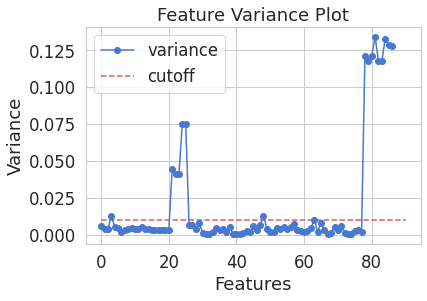

In [ ]:
# calculating variances & plotting it. Picked .015 just as it cuts off 3 lowest variances  
var_features = np.var(X_train_mm_scale, axis=0)

plt.plot(var_features , marker='o' , label='variance')
plt.hlines(0.010, xmin = 0, xmax = 90, colors='r', linestyles='--', label='cutoff')

plt.title("Feature Variance Plot")
plt.xlabel("Features")
plt.ylabel("Variance")
plt.legend()
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.010)

selector_fitted = selector.fit(X_train_mm_scale)

print(selector_fitted)

VarianceThreshold(threshold=0.01)


In [ ]:
# using the fitted variance threshold selector

X_train_scale_thresh = selector_fitted.transform(X_train_scale)
X_test_scale_thresh = selector_fitted.transform(X_test_scale)


# quick check to make sure it worked, should have 13 features
# quick print of shapes to see difference
print(f'Train data:\nBefore feature reduction shape: {X_train_scale.shape} , after feature reduction applied: {X_train_scale_thresh.shape} ')
print(f'\nTest data:\nBefore feature reduction shape: {X_test_scale.shape} , after feature reduction applied: {X_test_scale_thresh.shape} ')

Train data:
Before feature reduction shape: (83873, 87) , after feature reduction applied: (83873, 17) 

Test data:
Before feature reduction shape: (38687, 87) , after feature reduction applied: (38687, 17) 


----------------------------------------------

In [ ]:

import time
from sklearn.metrics import accuracy_score, log_loss , recall_score , f1_score, precision_score , roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier , LogisticRegression
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [
               
    # Too much computation to run now since using entire data and not segmenting on location 
    ##KNeighborsClassifier(),
    ##GradientBoostingClassifier(),
    ##LabelPropagation(),
    # DecisionTreeClassifier(),
    # RandomForestClassifier(),
    # AdaBoostClassifier(),
    # GaussianNB(),
    # LinearDiscriminantAnalysis(),
    # QuadraticDiscriminantAnalysis(),
    # LinearSVC(),
    # SGDClassifier(),
    # MLPClassifier(),
    # PassiveAggressiveClassifier(),
    # ExtraTreesClassifier(),
    # BaggingClassifier(),

    DecisionTreeClassifier(criterion = 'entropy' , max_depth = 10 , min_samples_leaf = 8 , min_samples_split = 3  ),
    MLPClassifier(hidden_layer_sizes = (200, 50 , 100) , activation = 'tanh' , solver = 'sgd' , alpha = 0.00001 , learning_rate = 'adaptive' ),
    LogisticRegression(C = 1 , multi_class = 'multinomial' , penalty = 'l2' , solver = 'newton-cg' )


  
    
     ]


# list to hold for dataframe
classifier_name_list = []
train_acc_list = []
train_bacc_list = []
test_acc_list = []
test_bacc_list = []
train_recall_list = []
test_recall_list = []
train_precision_list = []
test_precision_list = []
train_f1_list = []
test_f1_list = []
training_timing = [] 
training_pred_timing = [] 
testing_pred_timing = [] 


for clf in classifiers:

    name = clf.__class__.__name__
    
    print("="*50)
    print(name)

    # just for timing model
    training_time0 = time.time()


    ################### This changes across runs ####################################################
    clf.fit(X_train_scale_thresh, y_train)

    # finished training 
    training_time1 = time.time()

    training_time = training_time1 - training_time0 
    
    print('****Results****')

    # just for timing model
    test_time0 = time.time()
    # Test Predictions

    ################### This changes across runs ####################################################
    test_predictions = clf.predict(X_test_scale_thresh)
    # just for timing model
    test_time1 = time.time()

    test_time = test_time1 - test_time0


    # Test Metrics
    acc            = accuracy_score(y_test, test_predictions)
    bal_acc        = balanced_accuracy_score(y_test, test_predictions)
    recall_test    = recall_score(y_test, test_predictions, average = 'weighted')
    f1_test        = f1_score(y_test, test_predictions ,  average = 'weighted')
    precision_test = precision_score(y_test, test_predictions,  average = 'weighted') 


    # just for timing model
    training_p_time0 = time.time()

    # Train Predictions

    ################### This changes across runs ####################################################
    train_predictions = clf.predict(X_train_scale_thresh)

    # just for timing model
    training_p_time1 = time.time()

    training_p_time = training_p_time1 - training_p_time0

    # Train Metrics

    ################### This changes across runs ####################################################
    train_acc       = accuracy_score(y_train, train_predictions)
    train_bal_acc   = balanced_accuracy_score(y_train, train_predictions)
    recall_train    = recall_score(y_train, train_predictions , average = 'weighted')
    f1_train        = f1_score(y_train, train_predictions ,  average = 'weighted')
    precision_train = precision_score(y_train, train_predictions,  average = 'weighted') 

    print("\n\nTest Classification Report\n")
    print(classification_report(y_test, test_predictions))


    # append to list to make a dataframe 
    classifier_name_list.append(name)
    
    training_timing.append(training_time)
    training_pred_timing.append(training_p_time)
    testing_pred_timing.append(test_time)


    train_acc_list.append(train_acc)
    test_acc_list.append(acc)

    train_bacc_list.append(train_bal_acc)
    test_bacc_list.append(bal_acc)

    train_recall_list.append(recall_train)
    test_recall_list.append(recall_test)

    train_precision_list.append(precision_train)
    test_precision_list.append(precision_test)

    train_f1_list.append(f1_train)
    test_f1_list.append(f1_test)




print("="*50)




DecisionTreeClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.40      0.23      0.29      2214
      Turn 1       0.38      0.55      0.45     10801
      Turn 2       0.38      0.60      0.46     10754
      Walk 1       0.24      0.05      0.08      4790
      Walk 2       0.28      0.12      0.17      6471
         sit       0.27      0.06      0.10      3657

    accuracy                           0.37     38687
   macro avg       0.32      0.27      0.26     38687
weighted avg       0.34      0.37      0.32     38687

MLPClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.38      0.31      0.35      2214
      Turn 1       0.40      0.58      0.48     10801
      Turn 2       0.39      0.61      0.48     10754
      Walk 1       0.25      0.06      0.10      4790
      Walk 2       0.29      0.12      0.16      6471
         sit       0.33      0.08      0.13      3657

    accuracy                           0.38     38687
   macro avg       0.34      0.29      0.28     38687
weighted avg       0.35      0.38      0.34     38687

LogisticRegression
****Results****


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Test Classification Report



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          Go       0.44      0.15      0.22      2214
      Turn 1       0.30      0.64      0.41     10801
      Turn 2       0.32      0.44      0.37     10754
      Walk 1       0.00      0.00      0.00      4790
      Walk 2       0.18      0.00      0.00      6471
         sit       0.47      0.01      0.02      3657

    accuracy                           0.31     38687
   macro avg       0.28      0.21      0.17     38687
weighted avg       0.27      0.31      0.23     38687



In [ ]:
train_metrics_df = pd.DataFrame()
test_metrics_df = pd.DataFrame()


train_metrics_df['Classifier'] = classifier_name_list
test_metrics_df['Classifier'] = classifier_name_list


# F1 Score First 
train_metrics_df['Train F1'] = train_f1_list
test_metrics_df['Test F1'] = test_f1_list 

# Recall
train_metrics_df['Train Recall'] = train_recall_list
test_metrics_df['Test Recall'] = test_recall_list

# Precision 
train_metrics_df['Train Precision'] = train_precision_list
test_metrics_df['Test Precision'] = test_precision_list

# Bal Acc
train_metrics_df['Train Balanced Accuracy'] = train_bacc_list
test_metrics_df['Test Balanced Accuracy'] = test_bacc_list

# Accuracy 
train_metrics_df['Train Accuracy'] = train_acc_list
test_metrics_df['Test Accuracy'] = test_acc_list 


#train_metrics_df.sort_values("Train F1" , ascending=False , inplace=True)
train_metrics_df.set_index('Classifier' , inplace=True)

#test_metrics_df.sort_values("Test F1" , ascending=False , inplace=True)
test_metrics_df.set_index('Classifier' , inplace=True)

train_metrics_df['Model Training Taken (seconds)']  = training_timing
test_metrics_df['Model Training Taken (seconds)']  = training_timing

train_metrics_df['Model Prediction Time Taken (seconds)']  = training_pred_timing
test_metrics_df['Model Prediction Time Taken (seconds)']  = testing_pred_timing




# display df
display(train_metrics_df)

,Train F1,Train Recall,Train Precision,Train Balanced Accuracy,Train Accuracy,Model Training Taken (seconds),Model Prediction Time Taken (seconds)
Classifier,,,,,,,
DecisionTreeClassifier,0.367470,0.417786,0.436272,0.317195,0.417786,6.062480,0.014650
MLPClassifier,0.368858,0.421554,0.410560,0.322359,0.421554,593.237196,1.344229
LogisticRegression,0.237763,0.323155,0.311533,0.211304,0.323155,10.123364,0.014750


In [ ]:
# display df
display(test_metrics_df)

,Test F1,Test Recall,Test Precision,Test Balanced Accuracy,Test Accuracy,Model Training Taken (seconds),Model Prediction Time Taken (seconds)
Classifier,,,,,,,
DecisionTreeClassifier,0.319571,0.366893,0.336151,0.269013,0.366893,6.062480,0.006655
MLPClassifier,0.336814,0.382971,0.352856,0.292840,0.382971,593.237196,0.681358
LogisticRegression,0.232430,0.310983,0.272138,0.206666,0.310983,10.123364,0.006294


------------------------------

# Below is using SelectKBest for feature reduction from sklearn 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [ ]:
# Set up of lists
list_of_bal = []
list_of_recall = []
list_of_precision = []
list_of_f1 = []




# using range(1, X_train_scale.shape[1]+1)

for k in range(1, X_train_scale.shape[1]+1 , 5):

    print(k)
    
    # initialize selector
    sel = SelectKBest(f_classif, k = k )
    
    # fit to and transform train & test data
    X_train_scale_sel = sel.fit_transform(X_train_scale , y_train)
    X_test_scale_sel = sel.transform(X_test_scale)
    
    # initalize MLP
    mlp_clf = MLPClassifier()
    
    # fit to train data 
    mlp_clf.fit(X_train_scale_sel , y_train)
    
    # predict on test data
    y_pred= mlp_clf.predict(X_test_scale_sel)
    
    
    # calculating bal acc
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    recall_     = recall_score(y_test, y_pred , average = 'weighted')
    f1_         = f1_score(y_test, y_pred ,  average = 'weighted')
    precision_  = precision_score(y_test, y_pred,  average = 'weighted') 

    
    # append score for this run
    list_of_bal.append(bal_acc)
    list_of_recall.append(recall_)
    list_of_precision.append(f1_)
    list_of_f1.append(precision_)


1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


16
21


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


26
31
36


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


41


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


46


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


51


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


56


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


61


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


66


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


71


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


76


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


81


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


86


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


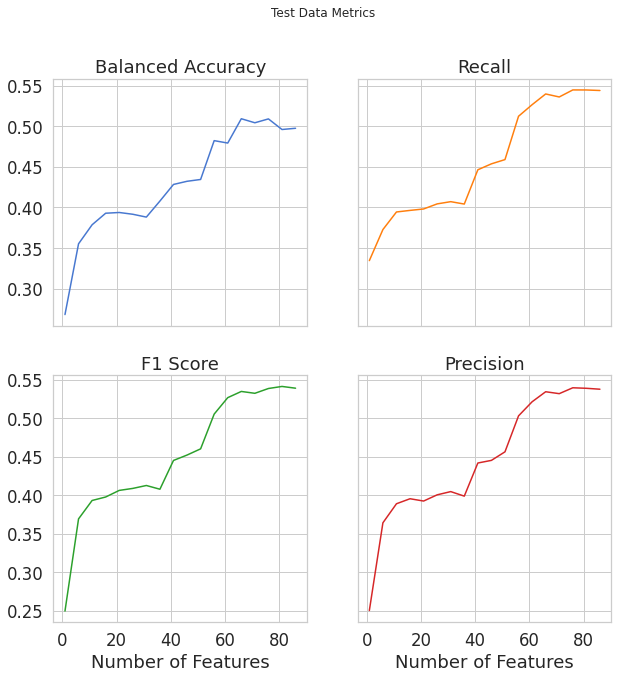

In [ ]:
fig, axs = plt.subplots(2, 2 , sharex='col', sharey='row' , figsize=(10,10))

fig.suptitle('Test Data Metrics')

# No of features
x = np.arange(1, X_train_scale.shape[1]+1 , 5)


axs[0, 0].plot(x, list_of_bal)
axs[0, 0].set_title('Balanced Accuracy')

axs[0, 1].plot(x, list_of_recall, 'tab:orange')
axs[0, 1].set_title('Recall')


axs[1, 0].plot(x, list_of_f1, 'tab:green')
axs[1, 0].set_title('F1 Score')


axs[1, 1].plot(x, list_of_precision, 'tab:red')
axs[1, 1].set_title('Precision')

for ax in axs.flat:
    ax.set(xlabel='Number of Features')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

---------------------------------

Check all models for 65 features

In [ ]:
# initialize selector
sel = SelectKBest(f_classif, k = 65 )


# fit to and transform train & test data
X_train_scale_sel_65 = sel.fit_transform(X_train_scale , y_train)
X_test_scale_sel_65 = sel.transform(X_test_scale)
    

In [ ]:

import time
from sklearn.metrics import accuracy_score, log_loss , recall_score , f1_score, precision_score , roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier , LogisticRegression
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [
               
    # Too much computation to run now since using entire data and not segmenting on location 
    ##KNeighborsClassifier(),
    ##GradientBoostingClassifier(),
    ##LabelPropagation(),
    # DecisionTreeClassifier(),
    # RandomForestClassifier(),
    # AdaBoostClassifier(),
    # GaussianNB(),
    # LinearDiscriminantAnalysis(),
    # QuadraticDiscriminantAnalysis(),
    # LinearSVC(),
    # SGDClassifier(),
    # MLPClassifier(),
    # PassiveAggressiveClassifier(),
    # ExtraTreesClassifier(),
    # BaggingClassifier(),

    DecisionTreeClassifier(criterion = 'entropy' , max_depth = 10 , min_samples_leaf = 8 , min_samples_split = 3  ),
    MLPClassifier(hidden_layer_sizes = (200, 50 , 100) , activation = 'tanh' , solver = 'sgd' , alpha = 0.00001 , learning_rate = 'adaptive' ),
    LogisticRegression(C = 1 , multi_class = 'multinomial' , penalty = 'l2' , solver = 'newton-cg' )


  
    
     ]


# list to hold for dataframe
classifier_name_list = []
train_acc_list = []
train_bacc_list = []
test_acc_list = []
test_bacc_list = []
train_recall_list = []
test_recall_list = []
train_precision_list = []
test_precision_list = []
train_f1_list = []
test_f1_list = []
training_timing = [] 
training_pred_timing = [] 
testing_pred_timing = [] 


for clf in classifiers:

    name = clf.__class__.__name__
    
    print("="*50)
    print(name)

    # just for timing model
    training_time0 = time.time()


    ################### This changes across runs ####################################################
    clf.fit(X_train_scale_sel_65, y_train)

    # finished training 
    training_time1 = time.time()

    training_time = training_time1 - training_time0 
    
    print('****Results****')

    # just for timing model
    test_time0 = time.time()
    # Test Predictions

    ################### This changes across runs ####################################################
    test_predictions = clf.predict(X_test_scale_sel_65)
    # just for timing model
    test_time1 = time.time()

    test_time = test_time1 - test_time0


    # Test Metrics
    acc            = accuracy_score(y_test, test_predictions)
    bal_acc        = balanced_accuracy_score(y_test, test_predictions)
    recall_test    = recall_score(y_test, test_predictions, average = 'weighted')
    f1_test        = f1_score(y_test, test_predictions ,  average = 'weighted')
    precision_test = precision_score(y_test, test_predictions,  average = 'weighted') 


    # just for timing model
    training_p_time0 = time.time()

    # Train Predictions

    ################### This changes across runs ####################################################
    train_predictions = clf.predict(X_train_scale_sel_65)

    # just for timing model
    training_p_time1 = time.time()

    training_p_time = training_p_time1 - training_p_time0

    # Train Metrics

    ################### This changes across runs ####################################################
    train_acc       = accuracy_score(y_train, train_predictions)
    train_bal_acc   = balanced_accuracy_score(y_train, train_predictions)
    recall_train    = recall_score(y_train, train_predictions , average = 'weighted')
    f1_train        = f1_score(y_train, train_predictions ,  average = 'weighted')
    precision_train = precision_score(y_train, train_predictions,  average = 'weighted') 

    print("\n\nTest Classification Report\n")
    print(classification_report(y_test, test_predictions))


    # append to list to make a dataframe 
    classifier_name_list.append(name)
    
    training_timing.append(training_time)
    training_pred_timing.append(training_p_time)
    testing_pred_timing.append(test_time)


    train_acc_list.append(train_acc)
    test_acc_list.append(acc)

    train_bacc_list.append(train_bal_acc)
    test_bacc_list.append(bal_acc)

    train_recall_list.append(recall_train)
    test_recall_list.append(recall_test)

    train_precision_list.append(precision_train)
    test_precision_list.append(precision_test)

    train_f1_list.append(f1_train)
    test_f1_list.append(f1_test)




print("="*50)




DecisionTreeClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.66      0.52      0.58      2214
      Turn 1       0.45      0.67      0.54     10801
      Turn 2       0.52      0.53      0.52     10754
      Walk 1       0.35      0.11      0.16      4790
      Walk 2       0.41      0.34      0.38      6471
         sit       0.33      0.28      0.30      3657

    accuracy                           0.46     38687
   macro avg       0.45      0.41      0.41     38687
weighted avg       0.45      0.46      0.44     38687

MLPClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.65      0.47      0.54      2214
      Turn 1       0.59      0.72      0.65     10801
      Turn 2       0.65      0.64      0.65     10754
      Walk 1       0.47      0.35      0.40      4790
      Walk 2       0.50      0.44      0.47      6471
         sit       0.47      0.52      0.49      3657

    accuracy                           0.57     38687
   macro avg       0.55      0.52      0.53     38687
weighted avg       0.57      0.57      0.57     38687

LogisticRegression
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.47      0.50      0.48      2214
      Turn 1       0.36      0.47      0.41     10801
      Turn 2       0.40      0.51      0.45     10754
      Walk 1       0.38      0.16      0.22      4790
      Walk 2       0.39      0.25      0.30      6471
         sit       0.

In [ ]:
train_metrics_df = pd.DataFrame()
test_metrics_df = pd.DataFrame()


train_metrics_df['Classifier'] = classifier_name_list
test_metrics_df['Classifier'] = classifier_name_list


# F1 Score First 
train_metrics_df['Train F1'] = train_f1_list
test_metrics_df['Test F1'] = test_f1_list 

# Recall
train_metrics_df['Train Recall'] = train_recall_list
test_metrics_df['Test Recall'] = test_recall_list

# Precision 
train_metrics_df['Train Precision'] = train_precision_list
test_metrics_df['Test Precision'] = test_precision_list

# Bal Acc
train_metrics_df['Train Balanced Accuracy'] = train_bacc_list
test_metrics_df['Test Balanced Accuracy'] = test_bacc_list

# Accuracy 
train_metrics_df['Train Accuracy'] = train_acc_list
test_metrics_df['Test Accuracy'] = test_acc_list 


#train_metrics_df.sort_values("Train F1" , ascending=False , inplace=True)
train_metrics_df.set_index('Classifier' , inplace=True)

#test_metrics_df.sort_values("Test F1" , ascending=False , inplace=True)
test_metrics_df.set_index('Classifier' , inplace=True)

train_metrics_df['Model Training Taken (seconds)']  = training_timing
test_metrics_df['Model Training Taken (seconds)']  = training_timing

train_metrics_df['Model Prediction Time Taken (seconds)']  = training_pred_timing
test_metrics_df['Model Prediction Time Taken (seconds)']  = testing_pred_timing




# display df
display(train_metrics_df)

,Train F1,Train Recall,Train Precision,Train Balanced Accuracy,Train Accuracy,Model Training Taken (seconds),Model Prediction Time Taken (seconds)
Classifier,,,,,,,
DecisionTreeClassifier,0.529738,0.546040,0.556668,0.494387,0.546040,24.229609,0.020902
MLPClassifier,0.724883,0.728840,0.727094,0.690434,0.728840,651.808622,1.386416
LogisticRegression,0.399714,0.410847,0.419743,0.382007,0.410847,95.024439,0.037238


In [ ]:
# display df
display(test_metrics_df)

,Test F1,Test Recall,Test Precision,Test Balanced Accuracy,Test Accuracy,Model Training Taken (seconds),Model Prediction Time Taken (seconds)
Classifier,,,,,,,
DecisionTreeClassifier,0.441397,0.461550,0.451823,0.407583,0.461550,24.229609,0.010255
MLPClassifier,0.565444,0.571148,0.568070,0.521984,0.571148,651.808622,0.704612
LogisticRegression,0.371949,0.384987,0.385285,0.355347,0.384987,95.024439,0.017141
